In [43]:
import os
import glob
from pathlib import Path
import numpy as np

import wispy.model_utils
import wispy.utils

import wispy.logger
import argparse

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

from cycler import cycler
from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [44]:
from collections import OrderedDict

In [45]:
hfiles = sorted(glob.glob("00*/history*"))
print(hfiles)

histories = OrderedDict()
for hfile in hfiles:
    key = hfile.split('/')[0]
    histories[key] = wispy.model_utils.load_history(hfile)

['001/history.pickle', '002/history.pickle', '003/history.pickle', '004/history.pickle', '005/history.pickle']


In [46]:
tfiles = sorted(glob.glob("00*/duration*"))
print(tfiles)

durations = OrderedDict()
for tfile in tfiles:
    key = tfile.split('/')[0]
    durations[key] = wispy.model_utils.load_datetime(tfile)

['001/duration.pickle', '002/duration.pickle', '003/duration.pickle', '004/duration.pickle', '005/duration.pickle']


In [47]:
for k,v in durations.items():
    print(k, v)

001 1:29:16.567038
002 5:49:04.487815
003 8:35:03.309560
004 1 day, 15:06:00.658046
005 3 days, 13:43:11.182153


In [48]:
histories.keys()

odict_keys(['001', '002', '003', '004', '005'])

In [49]:
# histories['001'].keys()

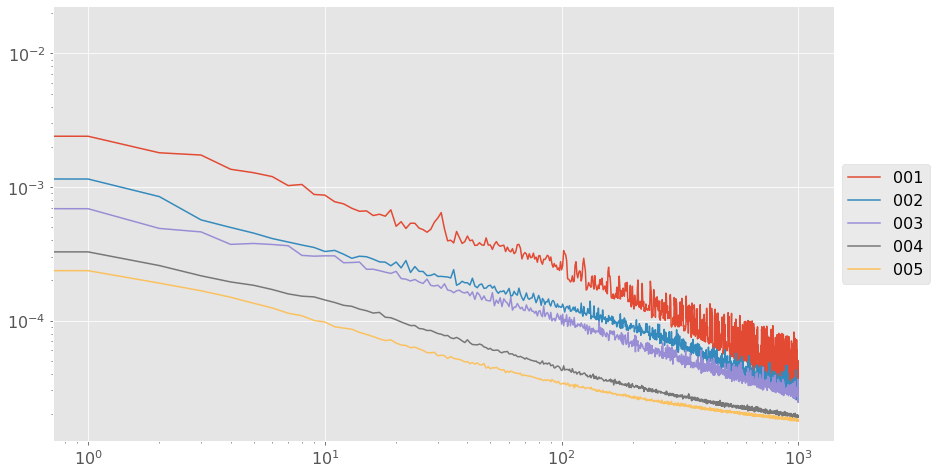

In [50]:
plt.figure(figsize=(14, 8))
for k,v in histories.items():
    plt.plot(v['mse'], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-4, 1e-3)

(9900.0, 10010.0)

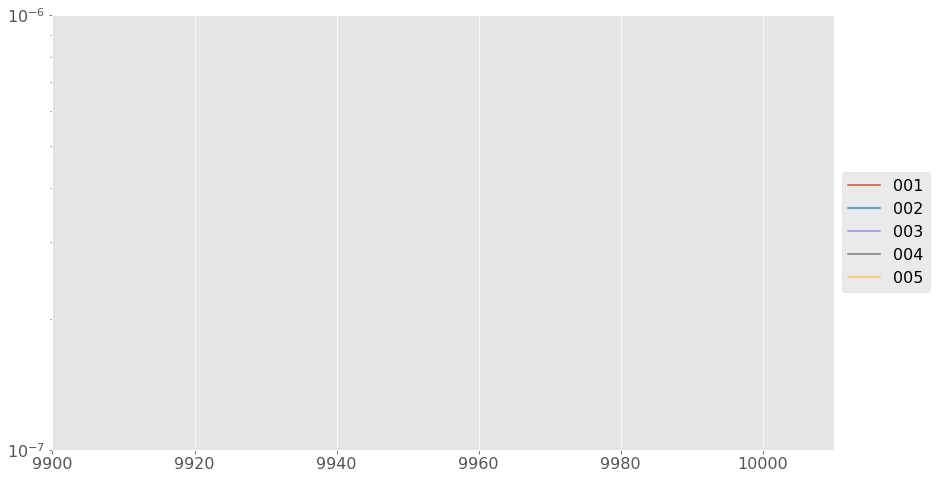

In [51]:
plt.figure(figsize=(14, 8))
for k,v in histories.items():
    plt.plot(v['mse'], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')
# plt.ylim(5e-6, 1e-4)
plt.ylim(1e-7, 1e-6)
plt.xlim(1e4-100, 1e4+10)

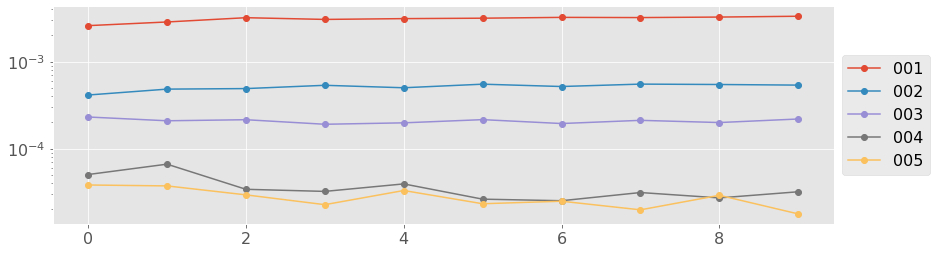

In [52]:
plt.figure(figsize=(14, 4))
for k,v in histories.items():
    plt.plot(v['val_mse'], 'o-', label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')